# Endemic  periodic solutions of seasonal epidemiological models with information-dependent vaccination
Shaday Guerrero Flores, email:shaday@ifm.umich.mx, shaday@matmor.unam.mx

Osvaldo Osuna, email:osvaldo@ifm.umich.mx

Cruz Vargas De León, email:leoncruz82@yahoo.com.mx



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import math
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.integrate import odeint
from sympy import integrate, init_printing
from sympy.abc import x
init_printing(use_latex="mathjax")
from sympy import cos,pi

plt.style.use('fivethirtyeight')
%matplotlib inline 

# Models
## The $SIR$ model for infectious diseases with permanent immunity
\begin{eqnarray}
\label{SIRM}
\displaystyle X^{\prime}(t)&=& \mu(1-\varphi_0)-\mu (1-\varphi_0 -\epsilon_1 )\frac{d M}{d M +1}  -\kappa(t)XY-\mu X, \nonumber \\
Y^{\prime}(t)&=&\kappa(t) XY-(\nu+\mu)Y, \\\
M^{\prime}(t)&=&a w Y -a M. \nonumber
\end{eqnarray}



In [2]:
def SIRm(y,t,beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1):
    S, I, M = y
    dSdt = mu*(1-phi_0) -mu*(1-phi_0-epsilon_1)* (d*M)/(d*M+1)-  (beta1 + lamda*np.cos(2*np.pi*t/365))*S * I  - mu*S
    dIdt =  (beta1 + lamda*np.cos(2*np.pi*t/365))*S * I - (mu + nu)* I
    dMdt = a*w*I-a*M
    return dSdt, dIdt, dMdt

## The $SIS$ model for infectious diseases without immunity
\begin{eqnarray}
\label{SISM}
\displaystyle X^{\prime}(t)&=& \mu(1-\varphi_0)-\mu (1-\varphi_0 -\epsilon_1 )\frac{d M}{d M +1}-\kappa(t)XY-\mu X+\nu Y, \nonumber \\
Y^{\prime}(t)&=&\kappa(t) XY-(\nu+\mu)Y, \\\
M^{\prime}(t)&=&a w Y -a M. \nonumber
\end{eqnarray}

In [3]:
def SISm(y,t,beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1):
    S, I, M = y
    dSdt = mu*(1-phi_0) -mu*(1-phi_0-epsilon_1)* (d*M)/(d*M+1) -  (beta1 + lamda* np.cos(2*np.pi*t/52))*S * I  - mu*S +nu*I
    dIdt =  (beta1 + lamda*np.cos(2*np.pi*t/52))*S * I - (mu + nu)* I
    dMdt = a*w*I-a*M
    return dSdt, dIdt, dMdt

# Function to plots

In [4]:
def plot_SISm(t,S,I,M):
    plt.figure(figsize=(16, 9))
    
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infectados')
    plt.xlabel('Tiempo en semanas', size=30)
    plt.ylabel('Fracción de la población', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20)
    plt.show()
    
    plt.figure(figsize=(16, 9))
    plt.plot(t,M,label='M')
    plt.xlabel('Tiempo en semanas', size=30)
    plt.ylabel('índice de información', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20)
    plt.show()
    

In [5]:
def plot_SISm_1(t,S,I,M):
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    plt.plot(t,S,label='Susceptible')
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Fracción de la población', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20)
    
    plt.subplot(3,1,2)
    plt.plot(t,I,label='Infectados')
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Fracción de la población', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20)
     
    plt.subplot(3,1,3)
    plt.plot(t,M,label='M')
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('índice de información', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20)
    #plt.savefig("plots\\SISM1.pdf", dpi=150, transparent=True, bbox_inches='tight')
    plt.show()

In [15]:
def plot_SIRm_2(t,S,I,M,S1,I1,M1):
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    plt.plot(t,S,label='Susceptible with periodic incidence rate')
    plt.plot(t,S1,label='Susceptible without periodic incidence rate',linestyle='dashed' )
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Susceptibles fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)
    
    plt.subplot(3,1,2)
    plt.plot(t,I,label='Infected with periodic incidence rate')   
    plt.plot(t,I1,label='Infected without periodic incidence rate',linestyle='dashed')  
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Infected fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)    
    
    plt.subplot(3,1,3)
    plt.plot(t,M,label='M with periodic incidence rate')
    plt.plot(t,M1,label='M without periodic incidence rate',linestyle='dashed')
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Information index', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)
    plt.savefig("plots\\SIRm-together.pdf", dpi=3000, transparent=True, bbox_inches='tight')
    plt.show()

In [62]:
def plot_SIRm_2_t(t,S,I,M,S1,I1,M1,t_inicio,t_final):
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    plt.plot(t,S,label='Susceptible with periodic incidence rate')
    plt.plot(t,S1,label='Susceptible without periodic incidence rate',linestyle='dashed' )
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Susceptibles fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlim(t_inicio,t_final)
    legend = plt.legend(fontsize=20, loc=1)
    
    plt.subplot(3,1,2)
    plt.plot(t,I,label='Infected with periodic incidence rate')   
    plt.plot(t,I1,label='Infected without periodic incidence rate',linestyle='dashed')  
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Infected fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlim(t_inicio,t_final)
    legend = plt.legend(fontsize=20, loc=1)    
    
    plt.subplot(3,1,3)
    plt.plot(t,M,label='M with periodic incidence rate')
    plt.plot(t,M1,label='M without periodic incidence rate',linestyle='dashed')
    plt.xlabel('Time (days)', size=20)
    plt.ylabel('Information index', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlim(t_inicio,t_final)
    legend = plt.legend(fontsize=20, loc=1)
    plt.savefig("plots\\SIRm15-30.pdf", dpi=3000, transparent=True, bbox_inches='tight')
    plt.show()

In [7]:
def plot_SISm_2(t,S,I,M,S1,I1,M1):
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    plt.plot(t,S,label='Susceptible with periodic incidence rate')
    plt.plot(t,S1,label='Susceptible without periodic incidence rate' ,linestyle='dashed')
    plt.xlabel('Time (weeks)', size=20)
    plt.ylabel('Susceptibles fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)
    
    plt.subplot(3,1,2)
    plt.plot(t,I,label='Infected with periodic incidence rate')
    plt.plot(t,I1,label='Infected without periodic incidence rate',linestyle='dashed')  
    
    plt.xlabel('Time (weeks)', size=20)
    plt.ylabel('Infected fraction', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)  
    
    plt.subplot(3,1,3)
    plt.plot(t,M,label='M with periodic incidence rate')
    plt.plot(t,M1,label='M without periodic incidence rate',linestyle='dashed')
    plt.xlabel('Time (weeks)', size=20)
    plt.ylabel('Information index', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    legend = plt.legend(fontsize=20, loc=1)
    plt.savefig("plots\\SISm-together.pdf", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()


# Simulations
## $SIR$ model

In [54]:
#SIR model with periodic incidence rate
beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 = 520/365, 0.1, 0.52, 1/27375,5000,0.80,0.3,1/7,0.45
parametersSIRm=beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 
S0,Y0=0.1,0.00025
M0= w*Y0
initialSIRm=S0,Y0,M0

t = np.linspace(0, 30000,300000) # set the time
ret = odeint(SIRm, initialSIRm, t, args=parametersSIRm) #integracion
S, I, M = ret.T

In [55]:
#condiciones
#
b0=520/365
beta_t1=b0*(1+ lamda*cos(2*np.pi*x/365))
beta_t1
kbarra1=integrate(beta_t1,(x,0,1))
kbarra1
Rv=(1-phi_0)*kbarra1/(nu +mu)
R0=kbarra1/(nu +mu)
teta=(1-phi_0 -epsilon_1)*d 
condincion1= nu +a*w
condicion2=beta1*(1-phi_0) +mu*teta
print('Rv=', Rv)
print('R0=', R0)
print('nu + a*w=', condincion1, '<',a)
print('beta1*(1-phi_0) +a*w=', condicion2,'<',a)
print('teta =', teta)
print('k(t)=', beta_t1)
print('kbarra', kbarra1)

Rv= 5.26416451783189
R0= 10.9670094121498
nu + a*w= 0.38285714285714284 < 0.8
beta1*(1-phi_0) +a*w= 0.6893150684931506 < 0.8
teta = 149.99999999999986
k(t)= 0.142465753424658*cos(0.01721420632104*x) + 1.42465753424658
kbarra 1.56711625165550


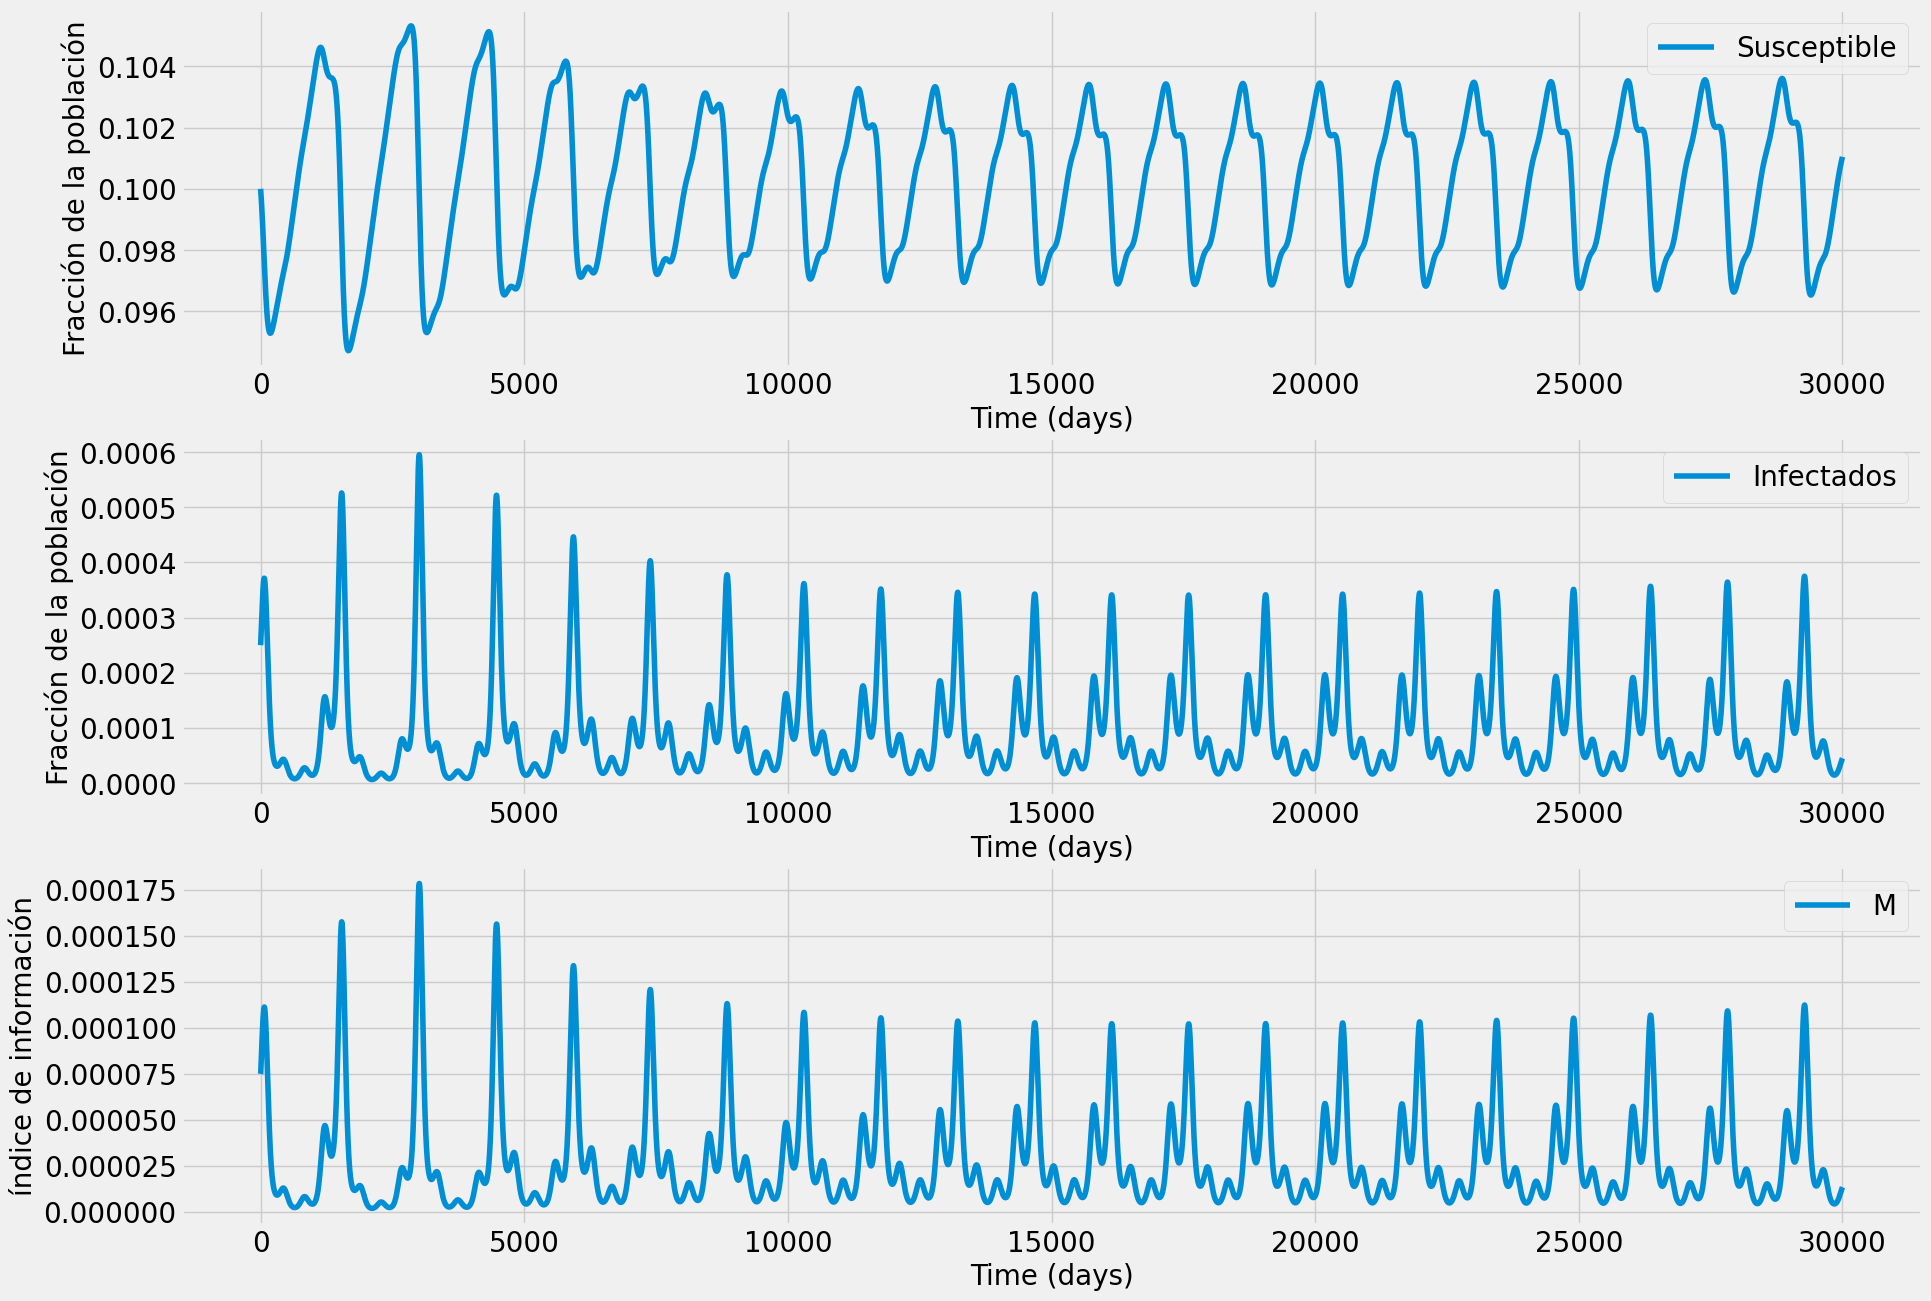

In [56]:
plot_SISm_1(t,S,I,M)

In [60]:
maximos = sorted(I[150000:200000], reverse=True)[:50]
maximos = sorted(enumerate(I), key=lambda x: x[1], reverse=True)[:50]
maximos

[(30075, 0.0005953638206962978), (30076, 0.0005953630711745696), (30074,
 0.0005953629397736297), (30077, 0.0005953606915034467), (30073, 0.00059
53604281332562), (30078, 0.0005953566819996701), (30072, 0.0005953562855
235139), (30079, 0.0005953510430017681), (30071, 0.0005953505117143374),
 (30080, 0.0005953437748701026), (30070, 0.0005953431064972127), (30081,
 0.0005953348779869171), (30069, 0.0005953340696851293), (30082, 0.00059
53243527563832), (30068, 0.0005953234011125342), (30083, 0.0005953121940
558533), (30067, 0.0005953111006352833), (30084, 0.000595298361745872), 
(30066, 0.0005952971681305954), (30085, 0.0005952828987726442), (30065, 
0.0005952816034970049), (30086, 0.0005952658054984899), (30064, 0.000595
2644066543137), (30087, 0.0005952470823053913), (30063, 0.00059524557754
35456), (30088, 0.0005952267295950191), (30062, 0.0005952251161268976), 
(30089, 0.0005952047477887593), (30061, 0.000595203022387694), (30090, 0
.0005951811373277386), (30060, 0.000595179296330338

In [57]:
#SIR model without periodic incidence rate ( lamda=0)
beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 = 520/365, 520/365*0, 0.52, 1/27375,5000,0.80,0.3,1/7,0.45
parametersSIRm=beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 
S0,Y0=0.1,0.00025
M0= w*Y0
initialSIRm=S0,Y0,M0
#integracion
t = np.linspace(0, 30000,300000)
ret = odeint(SIRm, initialSIRm, t, args=parametersSIRm)
S1, I1, M1 = ret.T

In [ ]:
#plot_SISm_1(t,S,I,M)



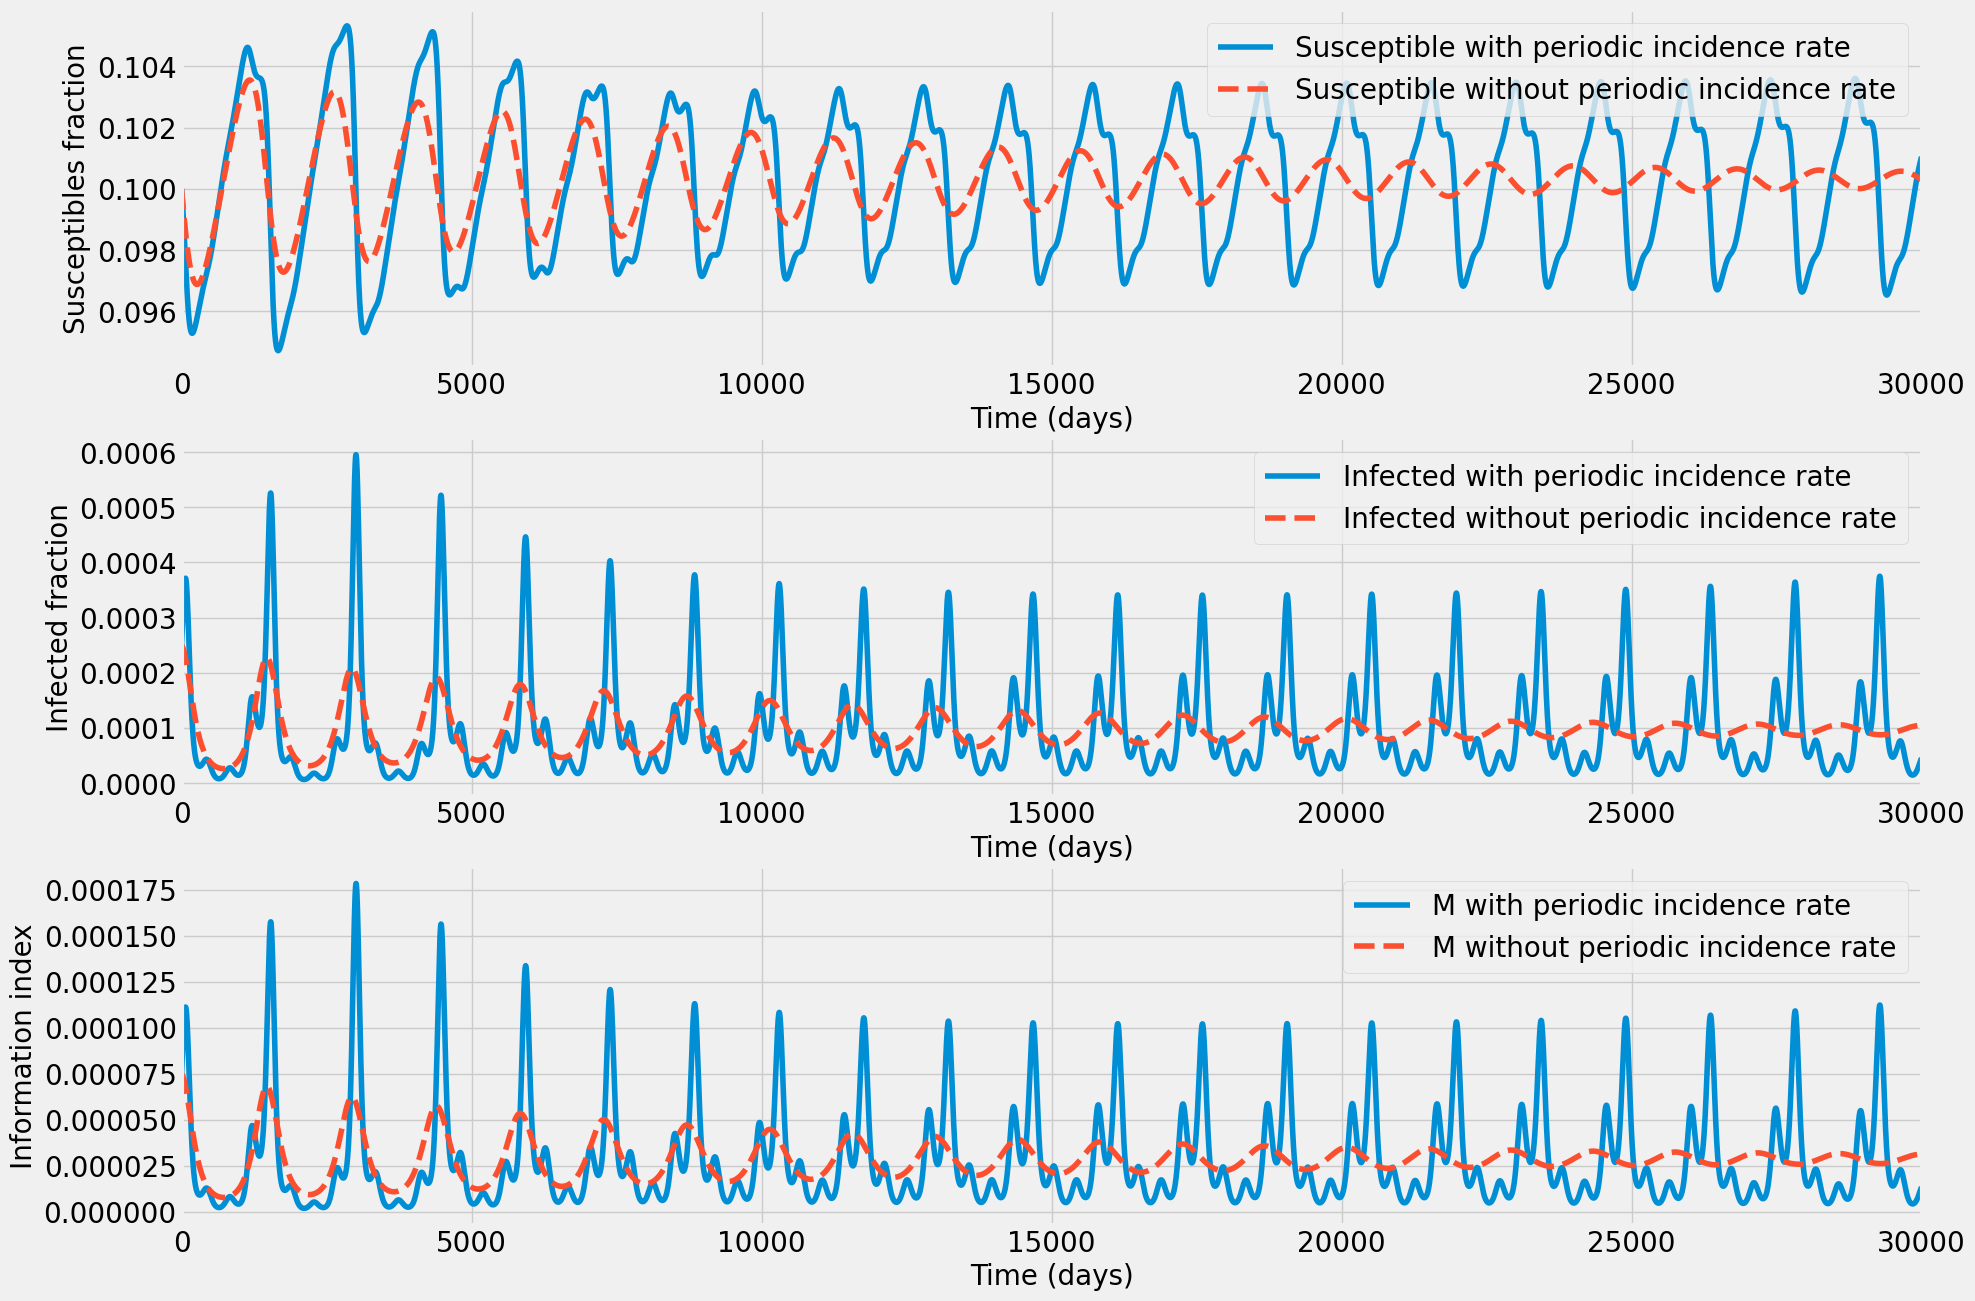

In [61]:
plot_SIRm_2_t(t,S,I,M,S1,I1,M1,0,30000)

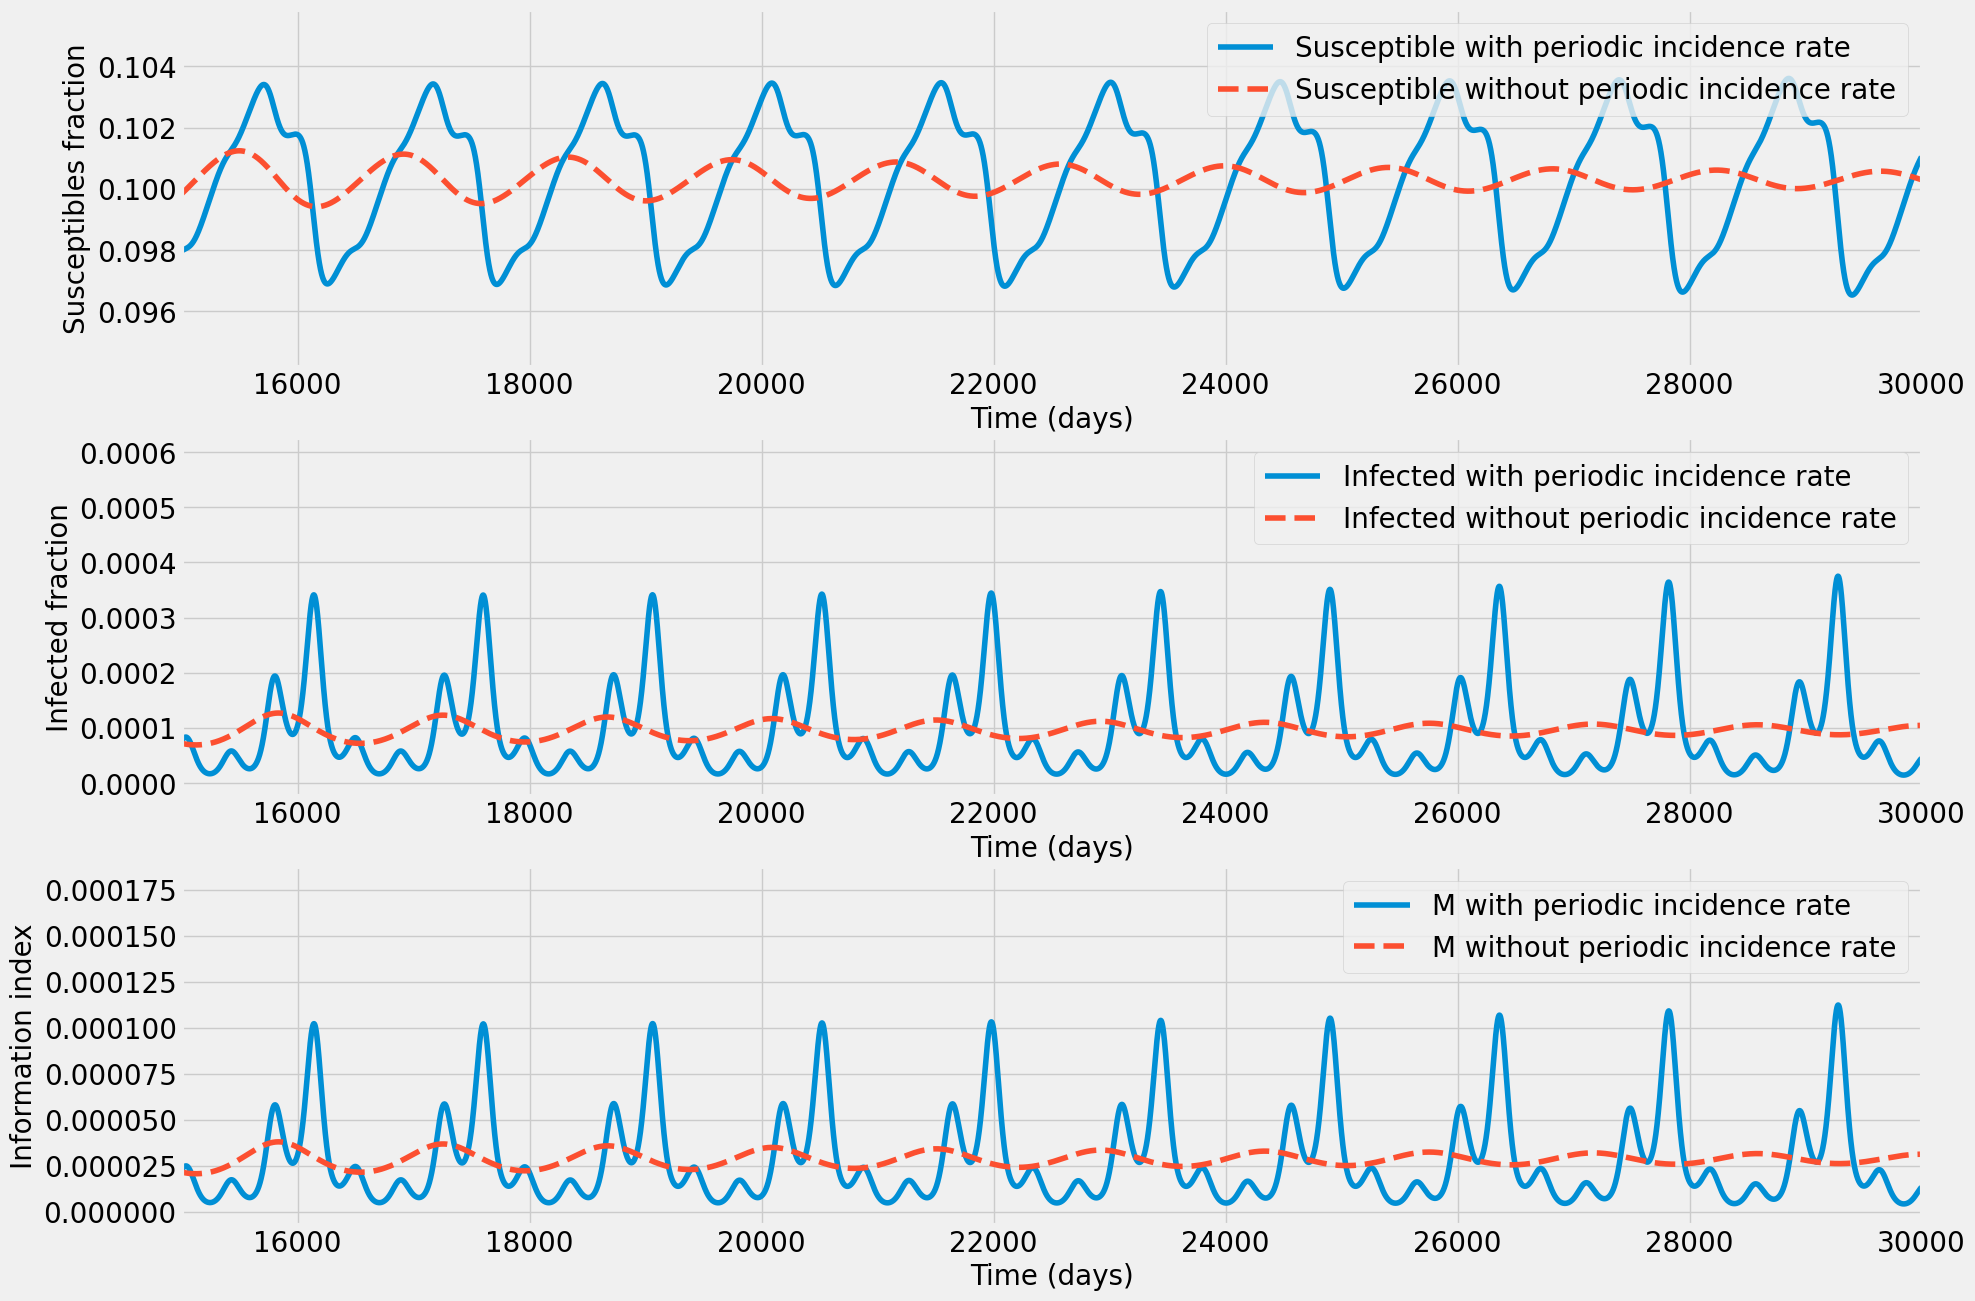

In [58]:
plot_SIRm_2_t(t,S,I,M,S1,I1,M1,15000,30000)

## $SIS$ model

In [36]:
#with periodic incidence rate
beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 = 2.295, 1.8, 0.75, 1/(52*75),5000,3/2,0.1,1/2,0.01
parametersSISm=beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 
S0,Y0=0.7,0.01
M0= w*Y0
initialSISm=S0,Y0,M0

t = np.linspace(0, 200,150000) # we define the time
ret = odeint(SISm, initialSISm, t, args=parametersSISm) # we integrate the sistem 
S, I, M = ret.T 

In [37]:
#condiciones
#
b0=2.295
beta_t1=b0+ lamda*cos(2*np.pi*x/52)
beta_t1
kbarra1=integrate(beta_t1,(x,0,1))
kbarra1
Rv=(1-phi_0)*kbarra1/(nu +mu)
R0=kbarra1/(nu +mu)
teta=(1-phi_0 -epsilon_1)*d 
condincion2= mu *teta
condicion3=beta1*(1-phi_0) +mu*a +nu
print('Rv=', Rv)
print('R0=', R0)
print(' mu *teta=', condincion2, '<',a)
print('\beta1*(1-phi_0) +mu*a +nu=', condicion3,'<',a)
print('teta =', teta)
print('k(t)=', beta_t1)
print('kbarra', kbarra1)

Rv= 2.04426325703741
R0= 8.17705302814965
 mu *teta= 0.3076923076923077 < 1.5
eta1*(1-phi_0) +mu*a +nu= 1.0741346153846154 < 1.5
teta = 1200.0
k(t)= 1.8*cos(0.120830486676531*x) + 2.295
kbarra 4.09062319433845


In [ ]:
#plot 
#plot_SISm_1(t,S,I,M)

In [38]:
#without periodic incidence rate ( lamda=0)
beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 = 2.295, 0, 0.75, 1/(52*75),5000,3/2,0.1,1/2,0.01
parametersSISm=beta1,lamda,phi_0,mu,d,a,w,nu,epsilon_1 
S0,Y0=0.7,0.01
M0= w*Y0
initialSISm=S0,Y0,M0

t = np.linspace(0, 200,150000) #set the time
ret = odeint(SISm, initialSISm, t, args=parametersSISm) #integracion
S1, I1, M1 = ret.T

In [ ]:
#plot alone
#plot_SISm_1(t,S1,I1,M1)

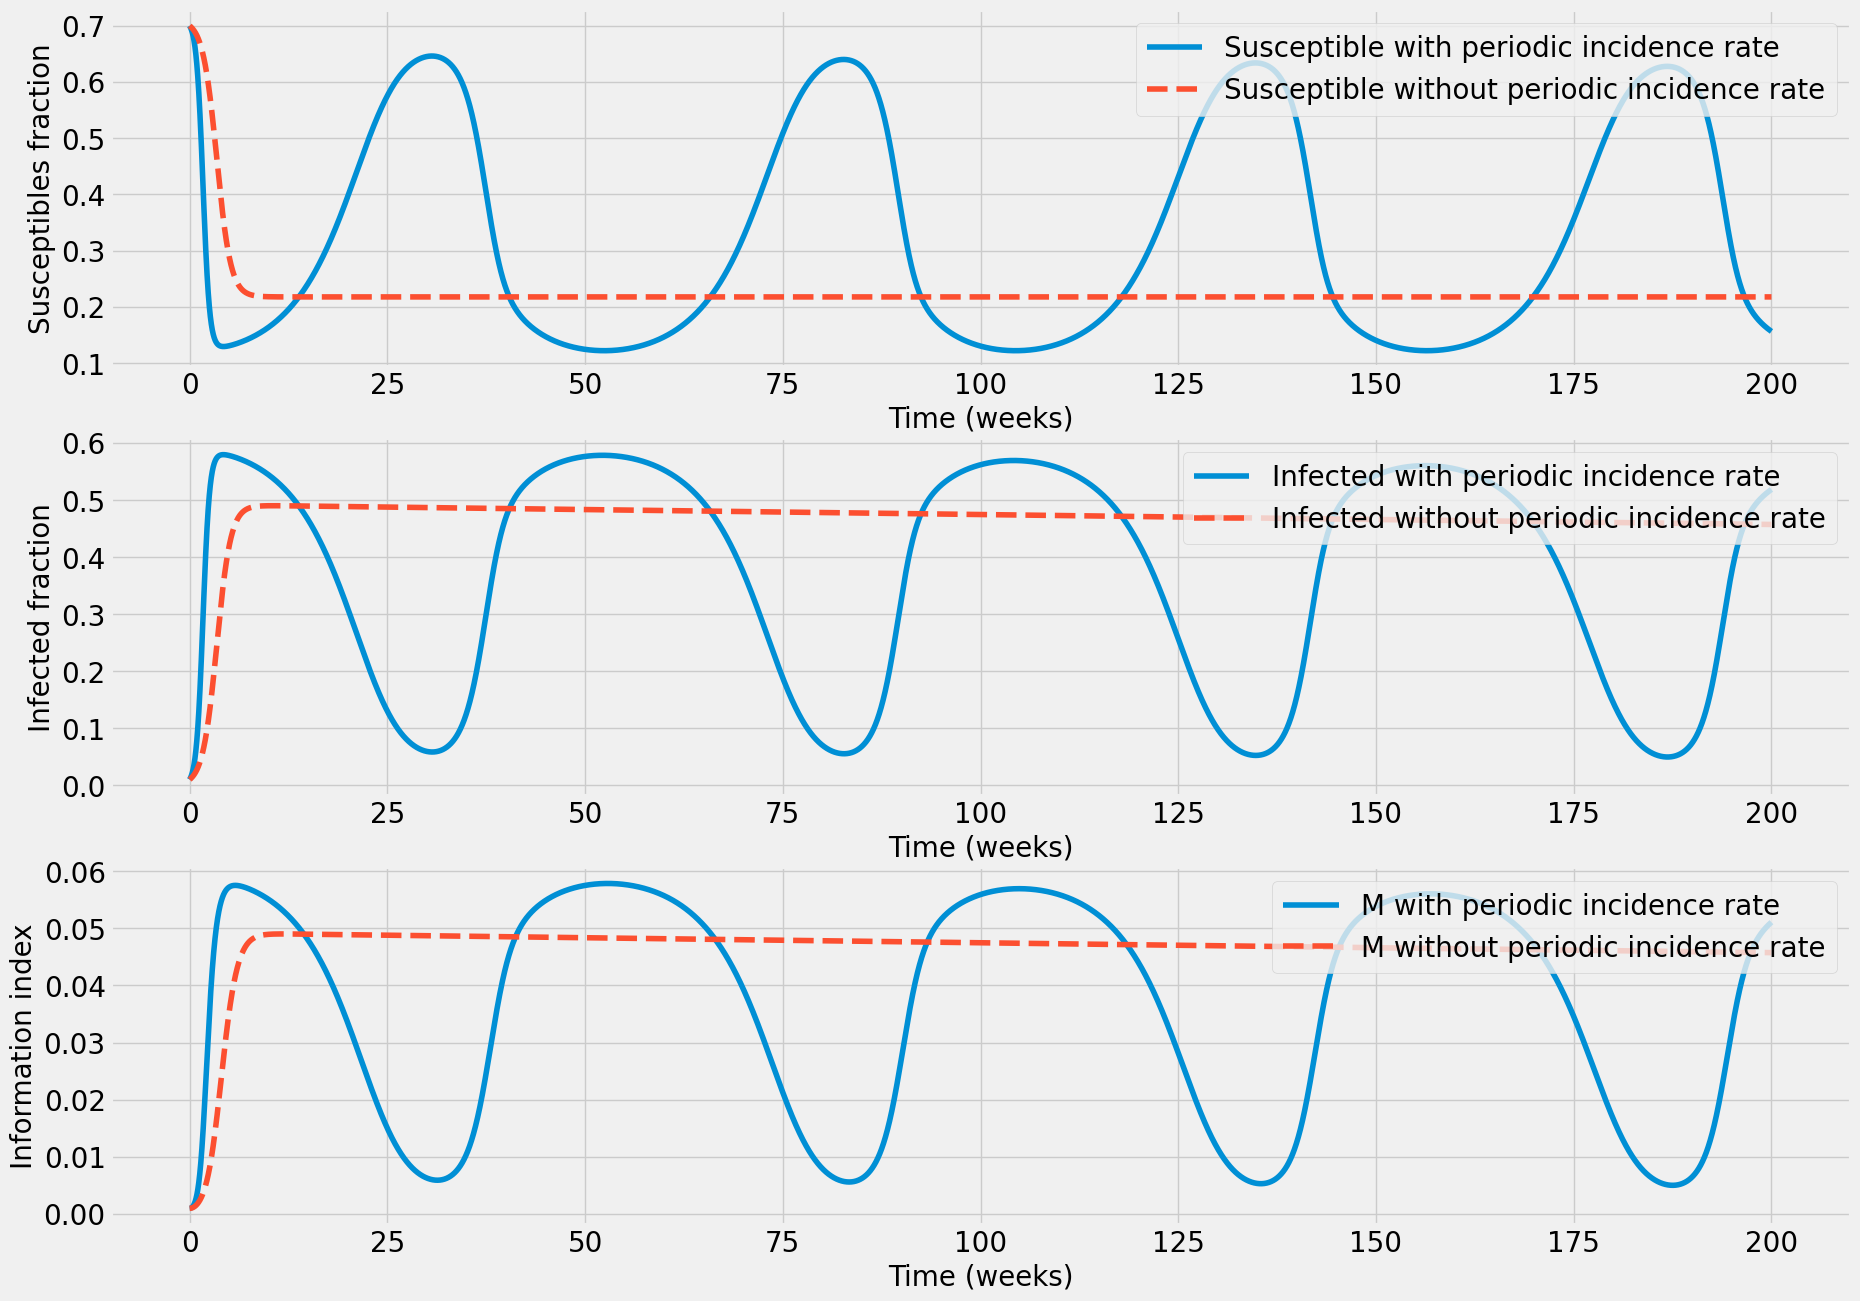

In [39]:
#plot together
plot_SISm_2(t,S,I,M,S1,I1,M1)